# One-layer Neural Network/Logistic Regression 

This tutorial demonstrates the usage of a 1-layer neural/network (or logistic regression classifier) to classify 2-dimensional synthetic data. We implement the network using the Keras API on top of TensorfFlow. Keras and TensorFlow are powerful frameworks that allow you to build many  deep-learning-based applications.

The goals of this tutorial are:
  - Introduce Keras and TensorFlow to implement a 1-layer neural network.
      
## Importing Python Libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation,Input 
from tensorflow.keras.optimizers import SGD

import sys
## Adding dataset_utils to the system path so we can import it
MY_UTILS_PATH = '../Modules/'
if not MY_UTILS_PATH in sys.path:
    sys.path.append(MY_UTILS_PATH)
import dataset_utils 

## Loading and Displaying 2D Dataset

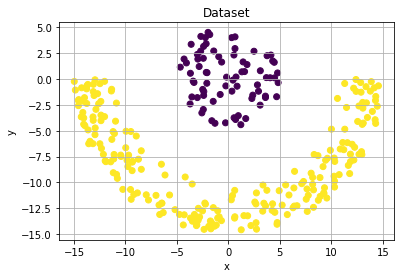

In [2]:
#Generating a synthetic dataset with four classes
nsamples = 300

#data = dataset_utils.corners(N = nsamples,scale = 0.5,gapwidth = 3,cornerwidth = 4) # linear dataset
data = dataset_utils.crescent_full_moon(N = nsamples,r1 = 5,r2 = 10,r3 = 15) #non-linear dataset

# Separating features (X) and labels (Y)
X = data[:,:-1] # Features
Y = data[:,-1].astype(int) # Labels

#Number of classes
k = np.unique(Y).size

colors = np.array(['r','y','b','g'])
#Displaying the dataset
plt.scatter(X[:,0],X[:,1],c=Y)

plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.title("Dataset")
plt.show()

## Data Normalization

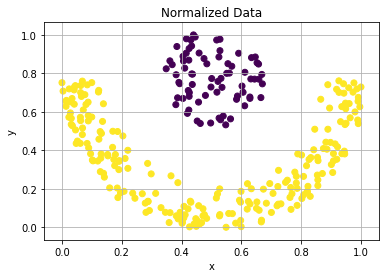

In [3]:
# min-max data normalization
X = (X-X.min(axis = 0,keepdims = True))/(X.max(axis = 0,keepdims = True)-X.min(axis = 0,keepdims = True))

#Displaying the normalized dataset
plt.scatter(X[:,0],X[:,1],c=Y)

plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.title("Normalized Data")
plt.show()

## Representing Labels using one-hot-ecoding

In [4]:
Y_oh = to_categorical(Y, k) 

# Displaying the 5 first elemnts
print('Y[:5]:')
print(Y[:5])
print('\nY_oh[:5]=')
print(Y_oh[:5])

Y[:5]:
[0 0 0 0 0]

Y_oh[:5]=
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


## Defining the One-layer Neural Network with Keras

In [5]:
def my_model(k,learning_rate = 0.15):
    inputs = Input(shape=(2,))
    out1 = Dense(k, activation='softmax')(inputs)
    model = Model(inputs=inputs, outputs=out1)
    sgd = SGD(lr=learning_rate)
    model.compile(optimizer=sgd, loss='categorical_crossentropy') 
    return model

## Training the Model

In [6]:
model = my_model(k)
print(model.summary())
batch_size = nsamples
nb_epoch = 10000
n = X.shape[0] # number of training examples
history = model.fit(X, Y_oh, batch_size=batch_size, epochs=nb_epoch,verbose=0)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
None


## Prininting Loss and estimated weights (Ws)

Final loss: 0.256457042619586
Bias:
 [-4.534806   4.5348053]
W:
 [[ 0.29761705 -0.29761696]
 [ 6.2924514  -6.292453  ]]


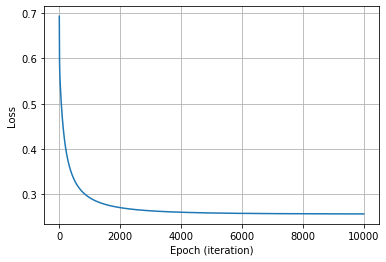

In [7]:
loss = model.evaluate(X, Y_oh, verbose=0)
print('Final loss:',loss)

W = model.get_weights()
print('Bias:\n', W[1])
print('W:\n', W[0])

plt.plot(history.history['loss'])
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.grid()
plt.show()

## Training Accuracy

In [8]:
Y_hat = model.predict(X).argmax(axis = 1)
accuracy = np.sum(Y_hat == Y)/np.float(n)
print('Accuracy: ', accuracy)

Accuracy:  0.86


## Logistic Regression Decision Boundary

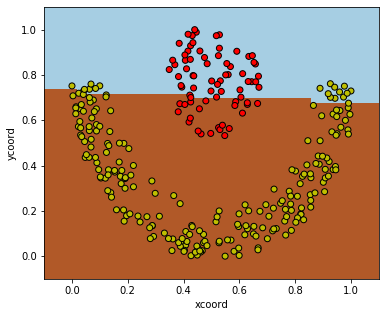

In [9]:
h = .02  # step size in the mesh
slack = 0.1
# Calcula a grade para o espaço de atributos

x_min, x_max = X.min(axis=0) - slack, X.max(axis=0) + slack
xx, yy = np.meshgrid(np.arange(x_min[0], x_max[0], h), np.arange(x_min[1], x_max[1], h))
X_grid = np.c_[xx.ravel(), yy.ravel()]

# Prediction of all samples in our grid
Z = model.predict(X_grid).argmax(axis = 1)
Z = Z.reshape(xx.shape)

# Display decision boundary
plt.figure(1, figsize=(6, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Display training samples
plt.scatter(X[:,0], X[:,1], c=colors[Y], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('xcoord')
plt.ylabel('ycoord')
plt.show()